In [2]:
options(warn = -1)
options(scipen = 100)
library(nnet)
library(party)
library(randomForest)
library(e1071)
library(caret)
library(dplyr)
library(Metrics)

In [3]:
# 정확도 (결정계수)
rsquare <- function(pred, y) {
    return (1- (sum((y-pred)^2) / sum((y-mean(y))^2)))
}

# 인공 신경망
f.nnet <- function(data.tr, x, y) {
    model.nnet <- nnet(cluster ~ ., data=data.tr, size = 10) 
    pred <- predict(model.nnet, x, type="class")
    return (mean(pred == y))
}

# 의사 결정 나무
f.ctree <- function(data.tr, x, y) {
    model.ctree <- ctree(cluster ~ ., data=data.tr)
    pred <- predict(model.ctree, x)
    return (mean(pred == y))
}

# RandomForest
f.randomForest <- function(data.tr, x, y) {
    model.rf <- randomForest(cluster ~ ., data=data.tr, ntree=100)
    pred <- predict(model.rf, x)
    return (mean(pred == y))
}


# SVM
f.svm <- function(data.tr, x, y) {
    model.svm <- svm(cluster ~., data=data.tr)
    pred <- predict(model.svm, x)
    return (mean(pred == y))
}

# 다항 로지스틱 회귀분석
f.multinom <- function(data.tr, x, y) {
    model.multinom <- multinom(cluster ~ ., data=data.tr)
    pred <- predict(model.multinom, x)
    return (mean(pred == y))
}


In [7]:
rice <- read.csv("../movies2/plzFinal_ML.csv", fileEncoding = "utf-8")

In [9]:
temp <- read.csv("../movies2/fortest2.csv", fileEncoding = "utf-8")

In [10]:
data <- read.csv("../movies2/fortest1.csv", fileEncoding = "utf-8")

In [11]:
data

cluster,누적관객수,스크린점유율,배급사점수,장르_관객점수부여,감독_배우시너지,감독점수,배우점수,배우점수2,배우점수3,배우점수4,배우점수5
1,4039891,23.79760,2,10,3,3.000000,4.000000,4.000000,2.000000,0.000000,0.000000
1,3678156,48.26242,2,10,8,2.000000,8.250000,8.250000,4.062019,8.250000,4.062019
1,3117859,36.90476,1,10,0,2.333333,4.000000,4.000000,2.000000,0.000000,0.000000
1,4313101,35.27944,3,10,3,3.571429,6.777778,6.777778,4.509250,6.777778,4.509250
1,3024666,21.64329,3,10,0,3.500000,7.666667,7.666667,5.153456,7.666667,5.153456
1,4111237,28.49592,2,20,6,3.500000,6.500000,6.500000,3.031895,3.250000,2.549510
1,3134421,18.14320,1,10,1,3.571429,6.777778,6.777778,4.509250,6.777778,4.509250
1,3755233,40.17705,3,10,5,1.500000,11.750000,11.750000,4.959511,11.750000,4.959511
1,3587182,34.01942,1,10,7,4.000000,4.000000,4.000000,2.000000,0.000000,0.000000
1,3420172,32.55022,3,10,4,4.000000,11.375000,11.375000,5.672156,11.375000,5.672156


In [12]:
data <- cbind(data,조연점수=temp$조연점수 )

In [13]:
data <- subset(data, select = -c(누적관객수, 배우점수2, 배우점수3, 배우점수4, 배우점수5))

In [14]:
data

cluster,스크린점유율,배급사점수,장르_관객점수부여,감독_배우시너지,감독점수,배우점수,조연점수
1,23.79760,2,10,3,3.000000,4.000000,8.000000
1,48.26242,2,10,8,2.000000,8.250000,12.250000
1,36.90476,1,10,0,2.333333,4.000000,10.600000
1,35.27944,3,10,3,3.571429,6.777778,10.600000
1,21.64329,3,10,0,3.500000,7.666667,14.500000
1,28.49592,2,20,6,3.500000,6.500000,11.500000
1,18.14320,1,10,1,3.571429,6.777778,7.900000
1,40.17705,3,10,5,1.500000,11.750000,10.250000
1,34.01942,1,10,7,4.000000,4.000000,8.000000
1,32.55022,3,10,4,4.000000,11.375000,7.000000


In [15]:
data$cluster <- as.factor(data$cluster)

In [16]:
data

cluster,스크린점유율,배급사점수,장르_관객점수부여,감독_배우시너지,감독점수,배우점수,조연점수
1,23.79760,2,10,3,3.000000,4.000000,8.000000
1,48.26242,2,10,8,2.000000,8.250000,12.250000
1,36.90476,1,10,0,2.333333,4.000000,10.600000
1,35.27944,3,10,3,3.571429,6.777778,10.600000
1,21.64329,3,10,0,3.500000,7.666667,14.500000
1,28.49592,2,20,6,3.500000,6.500000,11.500000
1,18.14320,1,10,1,3.571429,6.777778,7.900000
1,40.17705,3,10,5,1.500000,11.750000,10.250000
1,34.01942,1,10,7,4.000000,4.000000,8.000000
1,32.55022,3,10,4,4.000000,11.375000,7.000000


In [17]:
cor(as.numeric(data$cluster), data$조연점수)

[1] 0.6813763

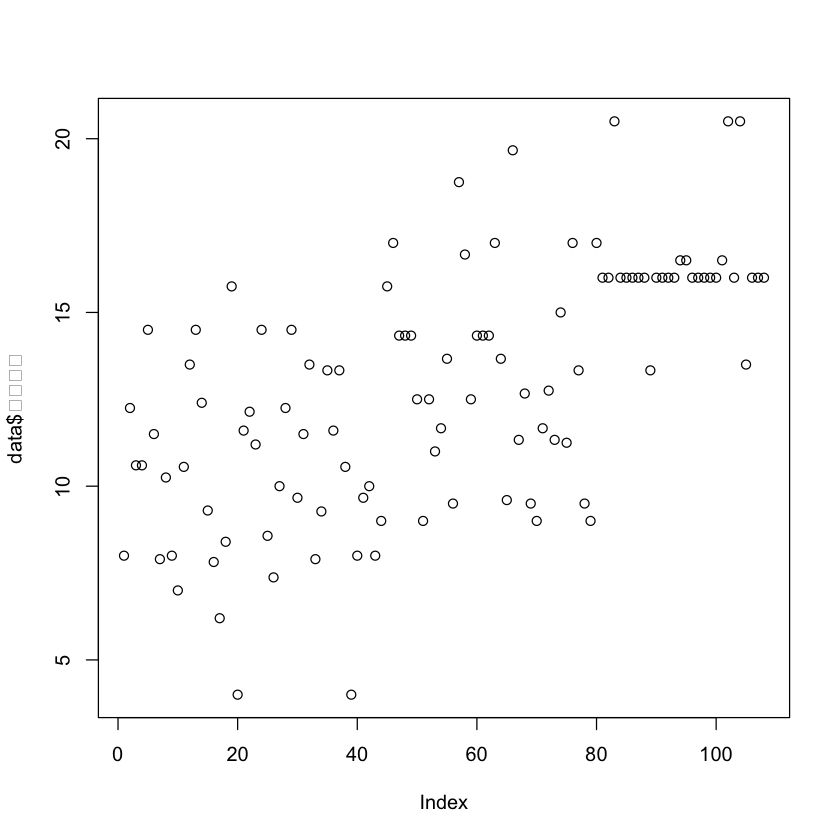

In [18]:
plot(data$조연점수)

In [19]:
result <- rep(0,5)
temp <- rep(0,5)
n <- 101
samp <- createDataPartition(data$cluster, p = 0.7, list = F)
for (i in 1:n) {


    # 학습용 데이터 셋
    data.tr <- subset(data[samp,], select = c(cluster, 배우점수, 조연점수,  스크린점유율, 감독점수, 장르_관객점수부여, 배급사점수))

    # 검증용 데이터셋
    data.test <- subset(data[-samp,], select = c(cluster, 배우점수,  조연점수,  스크린점유율, 감독점수, 장르_관객점수부여, 배급사점수))

    # 문제 및 정답 만들기
    x <- subset(data.test, select = -cluster)
    y <- data.test$cluster
    result[1] <- result[1] + f.nnet(data.tr, x, y)
    result[2] <- result[2] + f.ctree(data.tr, x, y)
    result[3] <- result[3] + f.randomForest(data.tr, x, y)
    result[4] <- result[4] + f.svm(data.tr, x, y)
    result[5] <- result[5] + f.multinom(data.tr, x, y)
    
    temp[1] <- temp[1] + f.nnet(data.tr, subset(data.tr, select = -cluster), data.tr$cluster)
    temp[2] <- temp[2] + f.ctree(data.tr, subset(data.tr, select = -cluster), data.tr$cluster)
    temp[3] <- temp[3] + f.randomForest(data.tr, subset(data.tr, select = -cluster), data.tr$cluster)
    temp[4] <- temp[4] + f.svm(data.tr, subset(data.tr, select = -cluster), data.tr$cluster)
    temp[5] <- temp[5] + f.multinom(data.tr, subset(data.tr, select = -cluster), data.tr$cluster)
}
result <- result / n
temp <- temp / n

# weights:  103
initial  value 86.899721 
iter  10 value 70.954714
iter  20 value 64.431253
iter  30 value 57.967305
iter  40 value 44.856393
iter  50 value 35.313107
iter  60 value 30.388808
iter  70 value 26.834132
iter  80 value 23.659301
iter  90 value 18.996843
iter 100 value 17.182070
final  value 17.182070 
stopped after 100 iterations
# weights:  24 (14 variable)
initial  value 84.593146 
iter  10 value 72.535352
iter  20 value 47.586092
iter  30 value 47.521739
iter  30 value 47.521739
final  value 47.521739 
converged
# weights:  103
initial  value 86.177396 
iter  10 value 79.898656
iter  20 value 71.518300
iter  30 value 59.462524
iter  40 value 46.260927
iter  50 value 43.847726
iter  60 value 40.815972
iter  70 value 38.204680
iter  80 value 35.513597
iter  90 value 35.014984
iter 100 value 34.428094
final  value 34.428094 
stopped after 100 iterations
# weights:  24 (14 variable)
initial  value 84.593146 
iter  10 value 72.535352
iter  20 value 47.586092
iter  30 value 4

initial  value 84.593146 
iter  10 value 72.535352
iter  20 value 47.586092
iter  30 value 47.521739
iter  30 value 47.521739
final  value 47.521739 
converged
# weights:  103
initial  value 97.725680 
iter  10 value 80.187029
iter  20 value 69.195230
iter  30 value 54.883286
iter  40 value 51.212744
iter  50 value 49.074850
iter  60 value 48.546674
iter  70 value 48.444920
iter  80 value 48.416002
iter  90 value 48.226359
iter 100 value 47.034724
final  value 47.034724 
stopped after 100 iterations
# weights:  24 (14 variable)
initial  value 84.593146 
iter  10 value 72.535352
iter  20 value 47.586092
iter  30 value 47.521739
iter  30 value 47.521739
final  value 47.521739 
converged
# weights:  103
initial  value 113.854344 
iter  10 value 83.394247
iter  10 value 83.394246
iter  10 value 83.394246
final  value 83.394246 
converged
# weights:  24 (14 variable)
initial  value 84.593146 
iter  10 value 72.535352
iter  20 value 47.586092
iter  30 value 47.521739
iter  30 value 47.521739

initial  value 84.593146 
iter  10 value 72.535352
iter  20 value 47.586092
iter  30 value 47.521739
iter  30 value 47.521739
final  value 47.521739 
converged
# weights:  103
initial  value 90.091148 
iter  10 value 72.778989
iter  20 value 59.801622
iter  30 value 55.786992
iter  40 value 44.446854
iter  50 value 35.003327
iter  60 value 32.915106
iter  70 value 30.503437
iter  80 value 29.858919
iter  90 value 28.701383
iter 100 value 28.254201
final  value 28.254201 
stopped after 100 iterations
# weights:  24 (14 variable)
initial  value 84.593146 
iter  10 value 72.535352
iter  20 value 47.586092
iter  30 value 47.521739
iter  30 value 47.521739
final  value 47.521739 
converged
# weights:  103
initial  value 95.260426 
iter  10 value 76.943705
iter  20 value 65.768876
iter  30 value 55.668435
iter  40 value 52.778598
iter  50 value 45.036079
iter  60 value 39.308821
iter  70 value 38.122490
iter  80 value 37.655709
iter  90 value 37.319851
iter 100 value 34.394316
final  value 3

initial  value 84.593146 
iter  10 value 72.535352
iter  20 value 47.586092
iter  30 value 47.521739
iter  30 value 47.521739
final  value 47.521739 
converged
# weights:  103
initial  value 94.029793 
iter  10 value 79.327488
iter  20 value 65.538108
iter  30 value 55.025142
iter  40 value 50.095574
iter  50 value 48.737333
iter  60 value 44.917547
iter  70 value 40.441096
iter  80 value 33.912316
iter  90 value 27.233221
iter 100 value 25.931650
final  value 25.931650 
stopped after 100 iterations
# weights:  24 (14 variable)
initial  value 84.593146 
iter  10 value 72.535352
iter  20 value 47.586092
iter  30 value 47.521739
iter  30 value 47.521739
final  value 47.521739 
converged
# weights:  103
initial  value 84.992018 
iter  10 value 76.864007
iter  20 value 66.061234
iter  30 value 56.271199
iter  40 value 52.748576
iter  50 value 51.088299
iter  60 value 50.160304
iter  70 value 49.852464
iter  80 value 49.697459
iter  90 value 49.578328
iter 100 value 49.348932
final  value 4

initial  value 84.593146 
iter  10 value 72.535352
iter  20 value 47.586092
iter  30 value 47.521739
iter  30 value 47.521739
final  value 47.521739 
converged
# weights:  103
initial  value 96.916681 
iter  10 value 81.052843
iter  20 value 70.377746
iter  30 value 57.630408
iter  40 value 55.508268
iter  50 value 50.944264
iter  60 value 50.939395
iter  70 value 50.935072
iter  80 value 50.710447
iter  90 value 50.703767
final  value 50.703757 
converged
# weights:  24 (14 variable)
initial  value 84.593146 
iter  10 value 72.535352
iter  20 value 47.586092
iter  30 value 47.521739
iter  30 value 47.521739
final  value 47.521739 
converged
# weights:  103
initial  value 111.966038 
iter  10 value 80.824734
iter  20 value 72.827966
iter  30 value 51.436182
iter  40 value 45.948127
iter  50 value 44.921067
iter  60 value 44.360111
iter  70 value 44.134426
iter  80 value 44.087943
iter  90 value 43.699105
iter 100 value 43.600882
final  value 43.600882 
stopped after 100 iterations
# we

initial  value 84.593146 
iter  10 value 72.535352
iter  20 value 47.586092
iter  30 value 47.521739
iter  30 value 47.521739
final  value 47.521739 
converged
# weights:  103
initial  value 93.112742 
iter  10 value 79.219548
iter  20 value 78.833050
iter  30 value 78.815356
iter  40 value 77.002890
iter  50 value 65.702059
iter  60 value 63.379510
iter  70 value 62.712230
iter  80 value 62.356729
iter  90 value 62.315005
iter 100 value 62.309364
final  value 62.309364 
stopped after 100 iterations
# weights:  24 (14 variable)
initial  value 84.593146 
iter  10 value 72.535352
iter  20 value 47.586092
iter  30 value 47.521739
iter  30 value 47.521739
final  value 47.521739 
converged
# weights:  103
initial  value 102.770009 
iter  10 value 75.458910
iter  20 value 52.917741
iter  30 value 42.819884
iter  40 value 32.319134
iter  50 value 27.060919
iter  60 value 23.220317
iter  70 value 22.902743
final  value 22.901591 
converged
# weights:  24 (14 variable)
initial  value 84.593146 

initial  value 84.593146 
iter  10 value 72.535352
iter  20 value 47.586092
iter  30 value 47.521739
iter  30 value 47.521739
final  value 47.521739 
converged
# weights:  103
initial  value 109.424010 
iter  10 value 81.379965
iter  20 value 67.059794
iter  30 value 62.046361
iter  40 value 60.581811
iter  50 value 56.787573
iter  60 value 52.828377
iter  70 value 51.908841
iter  80 value 51.096274
iter  90 value 50.734938
iter 100 value 50.725643
final  value 50.725643 
stopped after 100 iterations
# weights:  24 (14 variable)
initial  value 84.593146 
iter  10 value 72.535352
iter  20 value 47.586092
iter  30 value 47.521739
iter  30 value 47.521739
final  value 47.521739 
converged
# weights:  103
initial  value 85.186897 
iter  10 value 75.053173
iter  20 value 60.469848
iter  30 value 51.018511
iter  40 value 45.048845
iter  50 value 44.519359
iter  60 value 44.347927
iter  70 value 44.265202
iter  80 value 44.251145
iter  90 value 43.814407
iter 100 value 41.244824
final  value 

initial  value 84.593146 
iter  10 value 72.535352
iter  20 value 47.586092
iter  30 value 47.521739
iter  30 value 47.521739
final  value 47.521739 
converged
# weights:  103
initial  value 125.572053 
iter  10 value 79.880979
iter  20 value 67.824972
iter  30 value 59.455799
iter  40 value 46.976371
iter  50 value 44.356800
iter  60 value 44.062840
iter  70 value 44.031039
iter  80 value 44.020331
iter  90 value 44.017865
iter 100 value 44.017600
final  value 44.017600 
stopped after 100 iterations
# weights:  24 (14 variable)
initial  value 84.593146 
iter  10 value 72.535352
iter  20 value 47.586092
iter  30 value 47.521739
iter  30 value 47.521739
final  value 47.521739 
converged
# weights:  103
initial  value 87.308997 
iter  10 value 79.612545
iter  20 value 71.498810
iter  30 value 66.796345
iter  40 value 57.980062
iter  50 value 51.425743
iter  60 value 39.624576
iter  70 value 31.583396
iter  80 value 29.453437
iter  90 value 27.920464
iter 100 value 27.851666
final  value 

initial  value 84.593146 
iter  10 value 72.535352
iter  20 value 47.586092
iter  30 value 47.521739
iter  30 value 47.521739
final  value 47.521739 
converged
# weights:  103
initial  value 85.781185 
iter  10 value 80.330446
iter  20 value 72.078088
iter  30 value 69.568002
iter  40 value 61.731427
iter  50 value 59.698497
iter  60 value 58.783388
iter  70 value 57.957724
iter  80 value 57.662972
iter  90 value 56.830708
iter 100 value 52.397024
final  value 52.397024 
stopped after 100 iterations
# weights:  24 (14 variable)
initial  value 84.593146 
iter  10 value 72.535352
iter  20 value 47.586092
iter  30 value 47.521739
iter  30 value 47.521739
final  value 47.521739 
converged
# weights:  103
initial  value 88.103069 
iter  10 value 76.592809
iter  20 value 72.410851
iter  30 value 69.494749
iter  40 value 65.380477
iter  50 value 57.696989
iter  60 value 41.456490
iter  70 value 40.547430
iter  80 value 40.300485
iter  90 value 38.325631
iter 100 value 36.699467
final  value 3

initial  value 84.593146 
iter  10 value 72.535352
iter  20 value 47.586092
iter  30 value 47.521739
iter  30 value 47.521739
final  value 47.521739 
converged
# weights:  103
initial  value 95.202486 
iter  10 value 79.103890
iter  20 value 60.317125
iter  30 value 50.165565
iter  40 value 39.048953
iter  50 value 34.661209
iter  60 value 33.230668
iter  70 value 30.863695
iter  80 value 30.763615
iter  90 value 30.739912
iter 100 value 30.736788
final  value 30.736788 
stopped after 100 iterations
# weights:  24 (14 variable)
initial  value 84.593146 
iter  10 value 72.535352
iter  20 value 47.586092
iter  30 value 47.521739
iter  30 value 47.521739
final  value 47.521739 
converged
# weights:  103
initial  value 85.632094 
iter  10 value 72.887980
iter  20 value 64.687771
iter  30 value 62.489605
iter  40 value 53.954321
iter  50 value 49.633069
iter  60 value 47.678774
iter  70 value 46.206662
iter  80 value 45.414261
iter  90 value 41.882275
iter 100 value 33.467402
final  value 3

initial  value 84.593146 
iter  10 value 72.535352
iter  20 value 47.586092
iter  30 value 47.521739
iter  30 value 47.521739
final  value 47.521739 
converged
# weights:  103
initial  value 102.915592 
iter  10 value 82.123630
iter  20 value 74.070041
iter  30 value 72.506392
iter  40 value 71.066116
iter  50 value 67.148357
iter  60 value 61.214126
iter  70 value 53.974401
iter  80 value 52.052295
iter  90 value 51.607690
iter 100 value 51.505462
final  value 51.505462 
stopped after 100 iterations
# weights:  24 (14 variable)
initial  value 84.593146 
iter  10 value 72.535352
iter  20 value 47.586092
iter  30 value 47.521739
iter  30 value 47.521739
final  value 47.521739 
converged
# weights:  103
initial  value 87.445705 
iter  10 value 74.511966
iter  20 value 65.307560
iter  30 value 51.562723
iter  40 value 41.288667
iter  50 value 31.561656
iter  60 value 28.910698
iter  70 value 28.740291
iter  80 value 28.699159
iter  90 value 28.685015
iter 100 value 28.679358
final  value 

initial  value 84.593146 
iter  10 value 72.535352
iter  20 value 47.586092
iter  30 value 47.521739
iter  30 value 47.521739
final  value 47.521739 
converged
# weights:  103
initial  value 89.864909 
iter  10 value 73.387995
iter  20 value 48.204085
iter  30 value 41.668345
iter  40 value 39.315074
iter  50 value 38.572424
iter  60 value 37.906333
iter  70 value 33.535460
iter  80 value 32.954654
iter  90 value 31.233887
iter 100 value 25.612558
final  value 25.612558 
stopped after 100 iterations
# weights:  24 (14 variable)
initial  value 84.593146 
iter  10 value 72.535352
iter  20 value 47.586092
iter  30 value 47.521739
iter  30 value 47.521739
final  value 47.521739 
converged
# weights:  103
initial  value 84.806194 
iter  10 value 75.438645
iter  20 value 61.077919
iter  30 value 57.256704
iter  40 value 53.378953
iter  50 value 49.408741
iter  60 value 37.537442
iter  70 value 36.135069
iter  80 value 35.447643
iter  90 value 33.441686
iter 100 value 32.215393
final  value 3

initial  value 84.593146 
iter  10 value 72.535352
iter  20 value 47.586092
iter  30 value 47.521739
iter  30 value 47.521739
final  value 47.521739 
converged
# weights:  103
initial  value 97.062892 
iter  10 value 79.576714
iter  20 value 73.897366
iter  30 value 58.430099
iter  40 value 45.787257
iter  50 value 41.399326
iter  60 value 40.942438
iter  70 value 40.603753
iter  80 value 40.504230
iter  90 value 40.455347
iter 100 value 40.345492
final  value 40.345492 
stopped after 100 iterations
# weights:  24 (14 variable)
initial  value 84.593146 
iter  10 value 72.535352
iter  20 value 47.586092
iter  30 value 47.521739
iter  30 value 47.521739
final  value 47.521739 
converged
# weights:  103
initial  value 86.591115 
iter  10 value 77.575273
iter  20 value 73.246710
iter  30 value 68.065930
iter  40 value 64.919810
iter  50 value 64.001914
iter  60 value 63.531653
iter  70 value 63.527507
iter  80 value 63.513202
iter  90 value 63.415258
iter 100 value 63.315309
final  value 6

In [20]:
res_all <- rbind(t(as.data.frame(temp)),
t(as.data.frame(result)))
colnames(res_all) <- c("인공신경망", "의사결정나무", "randomForest", "SVM", "다항로지스틱회귀분석")
rownames(res_all) <- c("트레이닝", "테스트")
res_all

,인공신경망,의사결정나무,randomForest,SVM,다항로지스틱회귀분석
트레이닝,0.7576186,0.6493506,1.0000000,0.8051948,0.6883117
테스트,0.4870648,0.6129032,0.7844139,0.7419355,0.8064516


In [22]:
mdata <- read.csv("../movies2/mainData.csv", fileEncoding = "utf-8")

In [23]:
mdata

영화명,누적매출액,누적관객수,스크린수,상영횟수,개봉일,배급사,등급,장르,감독,...,스크린점유율,배우누적점수,배우점수,감독점수,장르_관객점수부여,휴일,X12세이상관람가,X15세이상관람가,전체관람가,청소년관람불가
7급 공무원,26380710000,4039891,475,90779,2009-04-22,롯데쇼핑㈜롯데엔터테인먼트,12세이상관람가,"코미디,액션,드라마,범죄",신태라,...,23.79760,6.50000,4.000000,3.000000,10,9,TRUE,FALSE,FALSE,FALSE
82년생 김지영,30298542310,3678156,1486,145441,2019-10-23,롯데컬처웍스(주)롯데엔터테인먼트,12세이상관람가,드라마,김도영,...,48.26242,14.75000,8.250000,2.000000,10,8,TRUE,FALSE,FALSE,FALSE
감기,21774884000,3117859,806,55046,2013-08-14,아이러브시네마,15세이상관람가,"드라마,어드벤처,액션",김성수,...,36.90476,10.50000,4.000000,2.333333,10,8,FALSE,TRUE,FALSE,FALSE
강철중: 공공의 적 1-1,28638460100,4313101,707,74157,2008-06-19,"CJ ENM,(주)시네마서비스",15세이상관람가,"드라마,액션",강우석,...,35.27944,10.63492,6.777778,3.571429,10,9,FALSE,TRUE,FALSE,FALSE
거북이 달린다,20618276000,3024666,432,69946,2009-06-11,(주)쇼박스,15세이상관람가,"드라마,액션,범죄",이연우,...,21.64329,17.66667,7.666667,3.500000,10,9,FALSE,TRUE,FALSE,FALSE
건축학개론,30223590400,4111237,593,106069,2012-03-22,롯데쇼핑㈜롯데엔터테인먼트,12세이상관람가,"멜로/로맨스,드라마",이용주,...,28.49592,16.75000,6.500000,3.500000,20,10,TRUE,FALSE,FALSE,FALSE
공공의 적 2,20091127000,3134421,299,40642,2005-01-27,(주)시네마서비스,15세관람가,드라마,강우석,...,18.14320,13.27778,6.777778,3.571429,10,12,FALSE,TRUE,FALSE,FALSE
국가부도의 날,30893315837,3755233,1180,101077,2018-11-28,CJ ENM,12세이상관람가,드라마,최국희,...,40.17705,36.41667,11.750000,1.500000,10,9,TRUE,FALSE,FALSE,FALSE
귀향,27249801990,3587182,876,90288,2016-02-24,(주)와우픽쳐스,15세이상관람가,드라마,조정래,...,34.01942,44.00000,4.000000,4.000000,10,9,FALSE,TRUE,FALSE,FALSE
그것만이 내 세상,27456797382,3420172,956,95437,2018-01-17,CJ ENM,12세이상관람가,"코미디,드라마",최성현,...,32.55022,15.62500,11.375000,4.000000,10,9,TRUE,FALSE,FALSE,FALSE


In [24]:
colnames(mdata)

[1] "영화명"               "누적매출액"           "누적관객수"          
 [4] "스크린수"             "상영횟수"             "개봉일"              
 [7] "배급사"               "등급"                 "장르"                
[10] "감독"                 "주연"                 "제작사"              
[13] "조연"                 "cluster"              "감독_배우시너지"     
[16] "감독_배우악연"        "상영횟수당누적관객수" "스크린점유율"        
[19] "배우누적점수"         "배우점수"             "감독점수"            
[22] "장르_관객점수부여"    "휴일"                 "X12세이상관람가"     
[25] "X15세이상관람가"      "전체관람가"           "청소년관람불가"

In [25]:
mdata$배급사 <- as.character(mdata$배급사)

In [26]:
(strsplit(as.character(mdata$배급사),",")[[4]][1])

[1] "CJ ENM"

In [27]:
for (i in 1:nrow(mdata)) {
    mdata$배급사[i] <- ((strsplit(as.character(mdata$배급사),","))[[i]][1])
    }

In [28]:
mdata$배급사

[1] "롯데쇼핑㈜롯데엔터테인먼트"       "롯데컬처웍스(주)롯데엔터테인먼트"
  [3] "아이러브시네마"                   "CJ ENM"                          
  [5] "(주)쇼박스"                       "롯데쇼핑㈜롯데엔터테인먼트"      
  [7] "(주)시네마서비스"                 "CJ ENM"                          
  [9] "(주)와우픽쳐스"                   "CJ ENM"                          
 [11] "(주)쇼박스"                       "(주)쇼박스"                      
 [13] "CJ ENM"                           "CJ ENM"                          
 [15] "(주)쇼박스"                       "워너브러더스 코리아(주)"         
 [17] "(주)쇼박스"                       "(주)쇼박스"                      
 [19] "(주)넥스트엔터테인먼트월드(NEW)"  "(주)넥스트엔터테인먼트월드(NEW)" 
 [21] "CJ ENM"                           "CJ ENM"                          
 [23] "(주)쇼박스"                       "(주)쇼박스"                      
 [25] "CJ ENM"                           "롯데쇼핑㈜롯데엔터테인먼트"      
 [27] "(주)에이스메이커무비웍스"         "(주)쇼박스"                      
 [29] "롯데쇼핑㈜롯데엔터테인먼트"       "CJ ENM"                          
 [31] "(주)쇼박스"                       "(주)싸이더스"                    
 [33] "CJ ENM"                           "(주)쇼박스"                      
 [35] "CJ ENM"                           "CJ ENM"                          
 [37] "롯데쇼핑㈜롯데엔터테인먼트"       "CJ ENM"                          
 [39] "CJ ENM"                           "롯데쇼핑㈜롯데엔터테인먼트"      
 [41] "CJ ENM"                           "CJ ENM"                          
 [43] "(주)넥스트엔터테인먼트월드(NEW)"  "(주)쇼박스"                      
 [45] "(주)넥스트엔터테인먼트월드(NEW)"  "(주)넥스트엔터테인먼트월드(NEW)" 
 [47] "CJ ENM"                           "CJ ENM"                          
 [49] "(주)쇼박스"                       "CJ ENM"                          
 [51] "(주)넥스트엔터테인먼트월드(NEW)"  "(주)넥스트엔터테인먼트월드(NEW)" 
 [53] "롯데쇼핑㈜롯데엔터테인먼트"       "롯데쇼핑㈜롯데엔터테인먼트"      
 [55] "CJ ENM"                           "(주)넥스트엔터테인먼트월드(NEW)" 
 [57] "(주)쇼박스"                       "(주)넥스트엔터테인먼트월드(NEW)" 
 [59] "(주)씨제이이엔엠"                 "(주)쇼박스"                      
 [61] "(주)쇼박스"                       "(주)쇼박스"                      
 [63] "(주)넥스트엔터테인먼트월드(NEW)"  "(주)넥스트엔터테인먼트월드(NEW)" 
 [65] "CJ ENM"                           "(주)넥스트엔터테인먼트월드(NEW)" 
 [67] "CJ ENM"                           "(주)넥스트엔터테인먼트월드(NEW)" 
 [69] "CJ ENM"                           "롯데컬처웍스(주)롯데엔터테인먼트"
 [71] "(주)쇼박스"                       "(주)쇼박스"                      
 [73] "CJ ENM"                           "(주)쇼박스"                      
 [75] "롯데쇼핑㈜롯데엔터테인먼트"       "(주)쇼박스"                      
 [77] "CJ ENM"                           "CJ ENM"                          
 [79] "CJ ENM"                           "(주)넥스트엔터테인먼트월드(NEW)" 
 [81] "CJ ENM"                           "(주)쇼박스"                      
 [83] "이십세기폭스코리아(주)"           "CJ ENM"                          
 [85] "롯데쇼핑㈜롯데엔터테인먼트"       "(주)쇼박스"                      
 [87] "(주)쇼박스"                       "CJ ENM"                          
 [89] "(주)쇼박스"                       "CJ ENM"                          
 [91] "(주)쇼박스"                       "(주)쇼박스"                      
 [93] "CJ ENM"                           "워너브러더스 코리아(주)"         
 [95] "메가박스중앙(주)플러스엠"         "CJ ENM"                          
 [97] "CJ ENM"                           "CJ ENM"                          
 [99] "CJ ENM"                           "CJ ENM"                          
[101] "(주)쇼박스"                       "CJ ENM"                          
[103] "CJ ENM"                           "롯데쇼핑㈜롯데엔터테인먼트"      
[105] "(주)쇼박스"                       "롯데쇼핑㈜롯데엔터테인먼트"      
[107] "CJ ENM"                           "CJ ENM"

In [29]:
for ( i in 1:nrow(mdata)) {
    if ( mdata$배급사[i] == "(주)씨제이이엔엠") {
        mdata$배급사[i] <- "CJ ENM"
    }
    if ( mdata$배급사[i] == "롯데쇼핑㈜롯데엔터테인먼트" | mdata$배급사[i] == "롯데컬처웍스(주)롯데엔터테인먼트") {
        mdata$배급사[i] <- "(주)롯데엔터테인먼트"
    }
}

In [30]:
test <- subset(mdata, select = c(cluster, 누적관객수, 배급사))

In [31]:
test <- cbind(test, clusterd=test$cluster^2)

In [32]:
str(test)

'data.frame':	108 obs. of  4 variables:
 $ cluster   : int  1 1 1 1 1 1 1 1 1 1 ...
 $ 누적관객수: int  4039891 3678156 3117859 4313101 3024666 4111237 3134421 3755233 3587182 3420172 ...
 $ 배급사    : chr  "(주)롯데엔터테인먼트" "(주)롯데엔터테인먼트" "아이러브시네마" "CJ ENM" ...
 $ clusterd  : num  1 1 1 1 1 1 1 1 1 1 ...


In [33]:
test

cluster,누적관객수,배급사,clusterd
1,4039891,(주)롯데엔터테인먼트,1
1,3678156,(주)롯데엔터테인먼트,1
1,3117859,아이러브시네마,1
1,4313101,CJ ENM,1
1,3024666,(주)쇼박스,1
1,4111237,(주)롯데엔터테인먼트,1
1,3134421,(주)시네마서비스,1
1,3755233,CJ ENM,1
1,3587182,(주)와우픽쳐스,1
1,3420172,CJ ENM,1


In [34]:
clusterd <- aggregate(cluster~배급사, test, mean)

In [35]:
clusterd

배급사,cluster
(주)넥스트엔터테인먼트월드(NEW),1.785714
(주)롯데엔터테인먼트,1.714286
(주)쇼박스,1.896552
(주)시네마서비스,1.000000
(주)싸이더스,1.000000
(주)에이스메이커무비웍스,1.000000
(주)와우픽쳐스,1.000000
메가박스중앙(주)플러스엠,3.000000
아이러브시네마,1.000000
워너브러더스 코리아(주),2.000000


In [36]:
for (i in 1:nrow(mdata)) {
    for (j in 1:nrow(clusterd)) {
        if (mdata$배급사[i] == clusterd$배급사[j]) {
            mdata$clusterd[i] <- clusterd$cluster[j]
        }
    }
}

In [37]:
table(mdata$clusterd)


               1 1.71428571428571 1.78571428571429 1.89655172413793 
               5               14               14               29 
1.95238095238095                2                3 
              42                2                2 

In [38]:
data$clusterd <- mdata$clusterd

In [39]:
cor(as.numeric(data$cluster), data$clusterd)
cor(as.numeric(data$cluster), data$배급사점수)

[1] 0.3211519

[1] 0.1195046

In [40]:
data

cluster,스크린점유율,배급사점수,장르_관객점수부여,감독_배우시너지,감독점수,배우점수,조연점수,clusterd
1,23.79760,2,10,3,3.000000,4.000000,8.000000,1.714286
1,48.26242,2,10,8,2.000000,8.250000,12.250000,1.714286
1,36.90476,1,10,0,2.333333,4.000000,10.600000,1.000000
1,35.27944,3,10,3,3.571429,6.777778,10.600000,1.952381
1,21.64329,3,10,0,3.500000,7.666667,14.500000,1.896552
1,28.49592,2,20,6,3.500000,6.500000,11.500000,1.714286
1,18.14320,1,10,1,3.571429,6.777778,7.900000,1.000000
1,40.17705,3,10,5,1.500000,11.750000,10.250000,1.952381
1,34.01942,1,10,7,4.000000,4.000000,8.000000,1.000000
1,32.55022,3,10,4,4.000000,11.375000,7.000000,1.952381


In [51]:
result <- rep(0,5)
temp <- rep(0,5)
n <- 20
set.seed(1234)
samp <- createDataPartition(data$cluster, p = 0.7, list = F)
for (i in 1:n) {
set.seed(i)

    # 학습용 데이터 셋
    data.tr <- subset(data[samp,], select = c(cluster, 배우점수, 조연점수,  스크린점유율, 감독점수, 장르_관객점수부여, clusterd))

    # 검증용 데이터셋
    data.test <- subset(data[-samp,], select = c(cluster, 배우점수, 조연점수,  스크린점유율, 감독점수, 장르_관객점수부여, clusterd))

    # 문제 및 정답 만들기
    x <- subset(data.test, select = -cluster)
    y <- data.test$cluster
    result[1] <- result[1] + f.nnet(data.tr, x, y)
    result[2] <- result[2] + f.ctree(data.tr, x, y)
    result[3] <- result[3] + f.randomForest(data.tr, x, y)
    result[4] <- result[4] + f.svm(data.tr, x, y)
    result[5] <- result[5] + f.multinom(data.tr, x, y)
    
    temp[1] <- temp[1] + f.nnet(data.tr, subset(data.tr, select = -cluster), data.tr$cluster)
    temp[2] <- temp[2] + f.ctree(data.tr, subset(data.tr, select = -cluster), data.tr$cluster)
    temp[3] <- temp[3] + f.randomForest(data.tr, subset(data.tr, select = -cluster), data.tr$cluster)
    temp[4] <- temp[4] + f.svm(data.tr, subset(data.tr, select = -cluster), data.tr$cluster)
    temp[5] <- temp[5] + f.multinom(data.tr, subset(data.tr, select = -cluster), data.tr$cluster)
}
result <- result / n
temp <- temp / n

# weights:  103
initial  value 116.394568 
iter  10 value 82.429540
iter  20 value 74.760459
iter  30 value 67.161842
iter  40 value 58.984777
iter  50 value 58.070539
iter  60 value 58.045036
iter  70 value 58.044565
final  value 58.044422 
converged
# weights:  24 (14 variable)
initial  value 84.593146 
iter  10 value 61.454728
iter  20 value 39.245017
iter  30 value 37.300712
iter  40 value 37.247383
iter  50 value 37.185366
final  value 37.185021 
converged
# weights:  103
initial  value 96.277520 
iter  10 value 76.565029
iter  20 value 60.559171
iter  30 value 53.888119
iter  40 value 51.686337
iter  50 value 50.042669
iter  60 value 49.351193
iter  70 value 48.902413
iter  80 value 48.485011
iter  90 value 48.298289
iter 100 value 46.707201
final  value 46.707201 
stopped after 100 iterations
# weights:  24 (14 variable)
initial  value 84.593146 
iter  10 value 61.454728
iter  20 value 39.245017
iter  30 value 37.300712
iter  40 value 37.247383
iter  50 value 37.185366
final  va

initial  value 84.593146 
iter  10 value 61.454728
iter  20 value 39.245017
iter  30 value 37.300712
iter  40 value 37.247383
iter  50 value 37.185366
final  value 37.185021 
converged
# weights:  103
initial  value 91.987178 
iter  10 value 77.784879
iter  20 value 64.142258
iter  30 value 50.660396
iter  40 value 43.960838
iter  50 value 42.471083
iter  60 value 40.020838
iter  70 value 37.718126
iter  80 value 36.559661
iter  90 value 34.810691
iter 100 value 32.866839
final  value 32.866839 
stopped after 100 iterations
# weights:  24 (14 variable)
initial  value 84.593146 
iter  10 value 61.454728
iter  20 value 39.245017
iter  30 value 37.300712
iter  40 value 37.247383
iter  50 value 37.185366
final  value 37.185021 
converged
# weights:  103
initial  value 88.478853 
iter  10 value 71.496020
iter  20 value 63.169817
iter  30 value 53.573987
iter  40 value 48.888193
iter  50 value 48.138799
iter  60 value 47.766638
iter  70 value 47.079171
iter  80 value 43.879950
iter  90 value

initial  value 84.593146 
iter  10 value 61.454728
iter  20 value 39.245017
iter  30 value 37.300712
iter  40 value 37.247383
iter  50 value 37.185366
final  value 37.185021 
converged
# weights:  103
initial  value 152.467733 
iter  10 value 82.666752
iter  20 value 81.173693
iter  30 value 81.170050
final  value 81.170048 
converged
# weights:  24 (14 variable)
initial  value 84.593146 
iter  10 value 61.454728
iter  20 value 39.245017
iter  30 value 37.300712
iter  40 value 37.247383
iter  50 value 37.185366
final  value 37.185021 
converged
# weights:  103
initial  value 112.716396 
iter  10 value 80.427179
iter  20 value 75.497127
iter  30 value 69.484150
iter  40 value 59.354069
iter  50 value 52.246163
iter  60 value 50.330805
iter  70 value 40.469579
iter  80 value 37.017001
iter  90 value 34.299986
iter 100 value 32.208135
final  value 32.208135 
stopped after 100 iterations
# weights:  24 (14 variable)
initial  value 84.593146 
iter  10 value 61.454728
iter  20 value 39.24501

In [50]:
res_all <- rbind(t(as.data.frame(temp)),
t(as.data.frame(result)))
colnames(res_all) <- c("인공신경망", "의사결정나무", "randomForest", "SVM", "다항로지스틱회귀분석")
rownames(res_all) <- c("트레이닝", "테스트")
res_all

,인공신경망,의사결정나무,randomForest,SVM,다항로지스틱회귀분석
트레이닝,0.7637907,0.6493506,1.00000,0.8181818,0.7922078
테스트,0.5410412,0.6129032,0.74481,0.7096774,0.6774194


In [46]:
# write.csv(data, "./배급사변경testdata.csv", row.names=F)